In [9]:
import os
import sys
import glob
import time

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [11]:
# 乱数シードを固定
np.random.seed(1234)

## Param

In [12]:
n = 20
a0 = -0.3
a1 = 0.5
x = 2 * np.random.rand(n, 1) - 1
t = a0 + a1 * x + np.random.normal(loc=0, scale=0.2, size=x.shape)
alpha = 2.0
beta = 25
m = np.zeros(2)
s = np.identity(2) / alpha

In [13]:
grid_x, grid_y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((grid_x, grid_y))

## Main

In [14]:
def calc_likelifood(beta, t, phi, w):
    w = np.array(w)
    mean = w.dot(phi.T)
    cov = np.eye(1) * (1 / beta)
    return multivariate_normal.pdf(t, mean=mean, cov=cov)

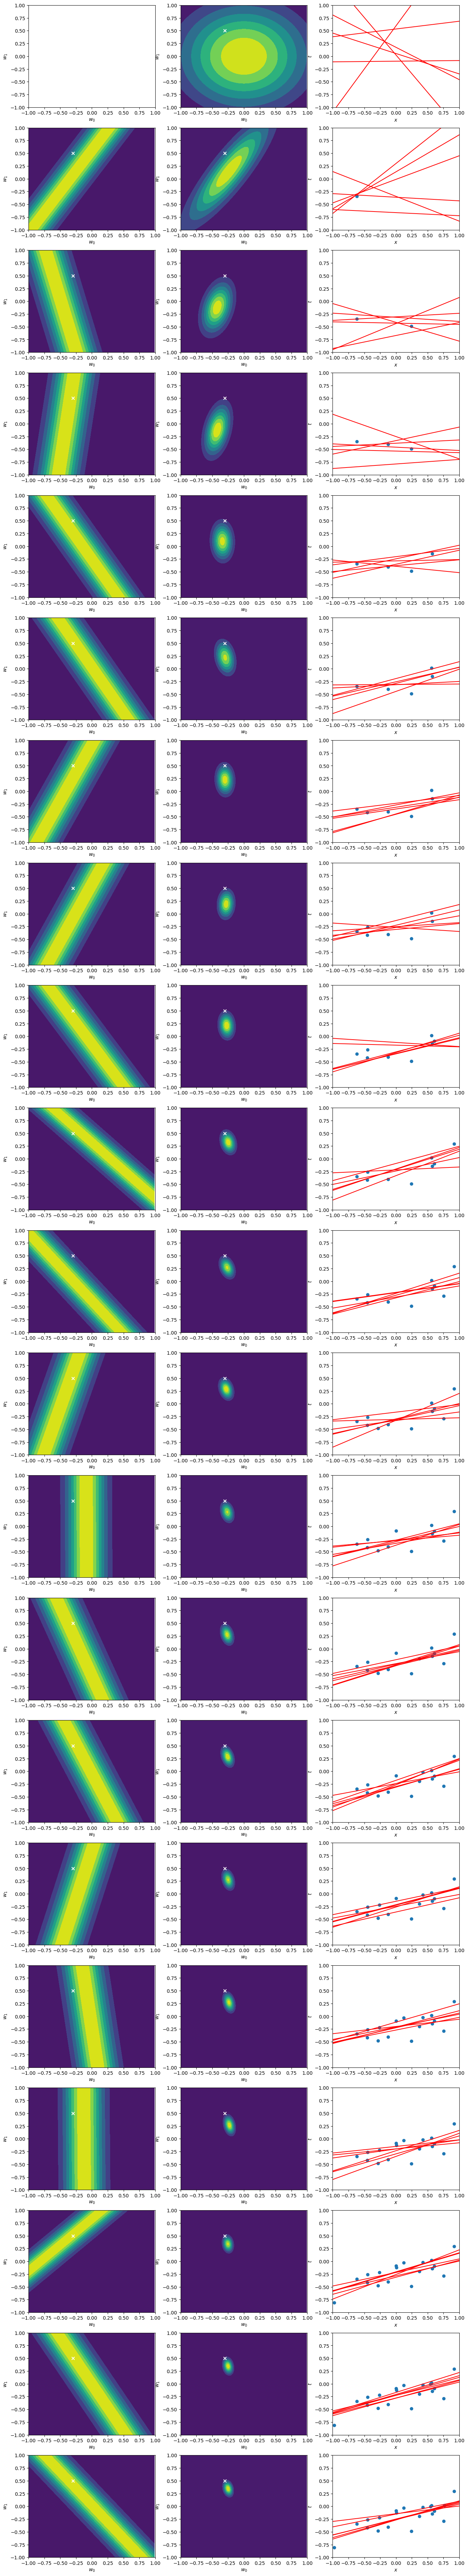

In [15]:
plt.figure(figsize=(16, 5 * n))

a_dist = multivariate_normal(m, s)
a_pdf = a_dist.pdf(pos)
a_samples = a_dist.rvs(size=6)

plt.subplot(n+2, 3, 1)
plt.plot()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

plt.subplot(n+2, 3, 2)
plt.contourf(grid_x, grid_y, a_pdf, cmap='viridis')
plt.scatter(a0, a1, marker='x', color='white')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

plt.subplot(n+2, 3, 3)
for (_a0, _a1) in a_samples:
    _x = np.linspace(-1, 1, 100)
    _t = _a0 + _a1 * _x
    plt.plot(_x, _t, color='red')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('$x$')
plt.ylabel('$t$')

for i in range(n):

    phi = np.array([[1, x[i][0]]])
    s_inv = np.linalg.inv(s)
    s = np.linalg.inv(s_inv + beta * phi.T @ phi)
    m = s @ (s_inv @ m + beta * phi.T @ t[i])

    prob_list = []
    for (_a0, _a1) in pos.reshape(-1, 2):
        prob_list.append(calc_likelifood(beta, t[i], phi, np.array([[_a0, _a1]])))

    a_dist = multivariate_normal(m, s)
    a_pdf = a_dist.pdf(pos)
    a_samples = a_dist.rvs(size=6)

    plt.subplot(n+2, 3, ( i + 1 ) * 3 + 1)
    plt.contourf(grid_x, grid_y, np.array(prob_list).reshape(grid_x.shape), cmap='viridis')
    plt.scatter(a0, a1, marker='x', color='white')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('$w_0$')
    plt.ylabel('$w_1$')

    plt.subplot(n+2, 3, ( i + 1 ) * 3 + 2)
    plt.contourf(grid_x, grid_y, a_pdf, cmap='viridis')
    plt.scatter(a0, a1, marker='x', color='white')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('$w_0$')
    plt.ylabel('$w_1$')

    plt.subplot(n+2, 3, ( i + 1 ) * 3 + 3)
    for (_a0, _a1) in a_samples:
        _x = np.linspace(-1, 1, 100)
        _t = _a0 + _a1 * _x
        plt.plot(_x, _t, color='red')
    plt.scatter(x[:i+1], t[:i+1])
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('$x$')
    plt.ylabel('$t$')